In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('internship assignment bipolar/CVAssignmentDataset.csv')

In [4]:
data.head()

,Class,Text
0,1,"Today, Senate Dems vote to #SaveTheInternet. P..."
1,1,RT @WinterHavenSun: Winter Haven resident / Al...
2,1,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...
3,1,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...
4,1,RT @Vegalteno: Hurricane season starts on June...


In [5]:
data.isnull().sum()

Class    0
Text     1
dtype: int64

In [6]:
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)

In [7]:
data.shape

(86460, 2)

C:\Users\ajay\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Class', ylabel='count'>

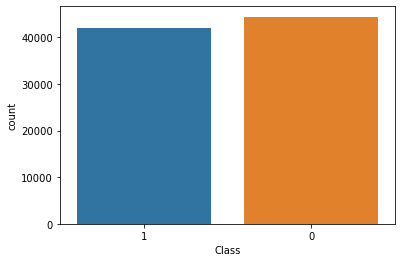

In [8]:
sns.countplot(data['Class'])

In [9]:
from keras.layers import Dense,BatchNormalization,Conv1D,MaxPooling1D,LSTM,Dropout
from keras.models import Sequential
from keras.preprocessing.text import one_hot
from keras.layers import Embedding
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [10]:
message=data['Text'].copy()

In [11]:
message

0        Today, Senate Dems vote to #SaveTheInternet. P...
1        RT @WinterHavenSun: Winter Haven resident / Al...
2        RT @NBCLatino: .@RepDarrenSoto noted that Hurr...
3        RT @NALCABPolicy: Meeting with @RepDarrenSoto ...
4        RT @Vegalteno: Hurricane season starts on June...
                               ...                        
86455    Check out my op-ed on need for End Executive O...
86456    Yesterday, Betty &amp; I had a great time lear...
86457    We are forever grateful for the service and sa...
86458    Happy first day of school @CobbSchools! #CobbB...
86459    #Zika fears realized in Florida. House GOP act...
Name: Text, Length: 86460, dtype: object

In [12]:
label=data['Class'].copy()

In [13]:
import re
import nltk
from nltk.corpus import stopwords

In [14]:
voc_size=10000
sent_length=50

In [15]:
def feature_scaling(message,voc_size,set_length):
    
    ps=nltk.PorterStemmer()
    corpus=[]
    for i in range(0,len(message)):
        review=re.sub('[^a-zA-Z]',' ',message[i])
        review=review.lower()
        review=review.split()
        review=[ps.stem(word) for word in review if not word in stopwords.words('english')]
        review=' '.join(review)
        corpus.append(review)
    onehot_repr=[one_hot(words,voc_size) for words in corpus]
    embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
    X=np.array(embedded_docs)
    return X


In [16]:
X=feature_scaling(message,voc_size,sent_length)

In [17]:
X

array([[   0,    0,    0, ..., 3923, 5874, 4292],
       [   0,    0,    0, ..., 2453, 3728,  820],
       [   0,    0,    0, ..., 2593, 4086,  297],
       ...,
       [   0,    0,    0, ..., 1888, 6232, 6788],
       [   0,    0,    0, ..., 3697,  455, 5900],
       [   0,    0,    0, ..., 2965, 3267, 6534]])

In [18]:
len(label)

86460

In [19]:
from keras.layers import Bidirectional

In [ ]:
model.add(Embedding(voc_size,50))
model.add(Conv1D(filters=32, kernel_size=2,input_dim=50,padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.8))
model.add(Bidirectional(LSTM(100)))
model.add(Dropout(0.5))

In [49]:
model=Sequential()
model.add(Embedding(voc_size,50,input_length=sent_length))
model.add(Conv1D(filters=32, kernel_size=2,input_dim=50,padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(50)))
model.add(Dropout(.2))
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


C:\Users\ajay\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(filters=32, kernel_size=2, padding="same", activation="relu", input_shape=(None, 50))`
  This is separate from the ipykernel package so we can avoid doing imports until


In [50]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 50, 50)            500000    
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 50, 32)            3232      
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 25, 32)            0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 25, 32)            0         
_________________________________________________________________
bidirectional_10 (Bidirectio (None, 100)               33200     
_________________________________________________________________
dropout_21 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 100)             

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train,X_test,y_train,y_test=train_test_split(X,label,random_state=20,test_size=.3)

In [51]:
hist=model.fit(X_train,y_train,epochs=10,batch_size=128,validation_data=(X_test,y_test))

C:\Users\ajay\AppData\Roaming\Python\Python37\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 60522 samples, validate on 25938 samples
Epoch 1/10
60522/60522 [==============================] - 60s 987us/step - loss: 0.5549 - accuracy: 0.6959 - val_loss: 0.4912 - val_accuracy: 0.7523
Epoch 2/10
60522/60522 [==============================] - 53s 879us/step - loss: 0.4367 - accuracy: 0.7913 - val_loss: 0.4875 - val_accuracy: 0.7570
Epoch 3/10
60522/60522 [==============================] - 66s 1ms/step - loss: 0.3707 - accuracy: 0.8316 - val_loss: 0.5030 - val_accuracy: 0.7510
Epoch 4/10
60522/60522 [==============================] - 62s 1ms/step - loss: 0.3004 - accuracy: 0.8692 - val_loss: 0.5479 - val_accuracy: 0.7518
Epoch 5/10
60522/60522 [==============================] - 54s 898us/step - loss: 0.2298 - accuracy: 0.9041 - val_loss: 0.6472 - val_accuracy: 0.7481
Epoch 6/10
60522/60522 [==============================] - 62s 1ms/step - loss: 0.1783 - accuracy: 0.9256 - val_loss: 0.7644 - val_accuracy: 0.7465
Epoch 7/10
60522/60522 [==============================] - 63s 

In [140]:
model.save('nlp1.h5')

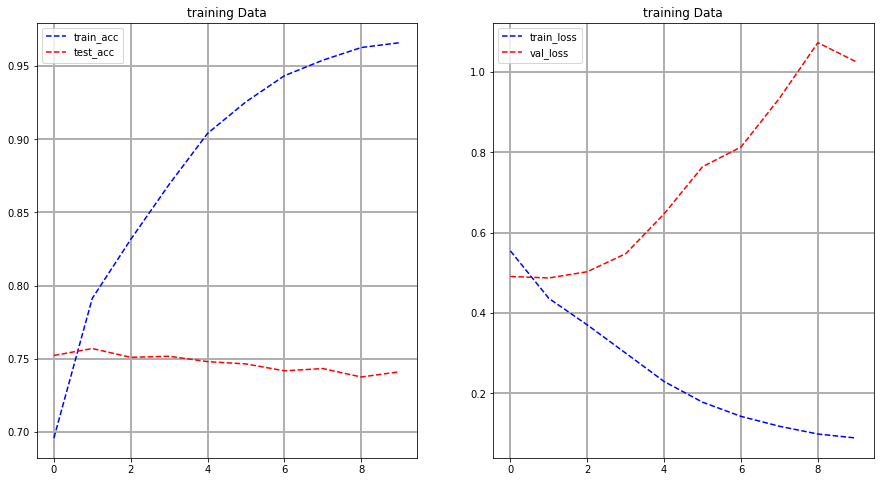

In [59]:
plt.figure(figsize=(15,8))
a=plt.subplot(1,2,1)
plt.plot(hist.history['accuracy'],'--',color='b',label='train_acc')
plt.plot(hist.history['val_accuracy'],'--',color='r',label='test_acc')
plt.title('training Data')
plt.legend()
plt.grid(linewidth=2)
a=plt.subplot(1,2,2)
plt.plot(hist.history['loss'],'--',color='b',label='train_loss')
plt.plot(hist.history['val_loss'],'--',color='r',label='val_loss')
plt.title('training Data')
plt.legend()
plt.grid(linewidth=2)
plt.show()

In [53]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [54]:
pred=model.predict_classes(X)

In [55]:
label=np.array(label)

In [56]:
labels=label.astype('int32')

In [57]:
label=label.reshape(86460,1)

In [58]:
accuracy=accuracy_score(labels,pred)

In [60]:
accuracy

0.9164931760351608

<AxesSubplot:>

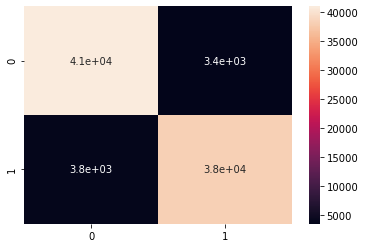

In [61]:
sns.heatmap(confusion_matrix(labels,pred),annot=True)